# Exercise 22 : Liang-Barsky Clipping
Using the Liang-Barsky, clip the following segment.

In [2]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

In [3]:
class Figure(object):
    def __init__(self):
        _, self.ax = plt.subplots()

    def draw(self):
        self.ax.axis((0, 300, 0, 200))
        self.ax.set_aspect(1)
        plt.show()
        
    def draw_polygon(self, points, linewidth=1, edgecolor='#000000'):
        polygon = Polygon(points, True, linewidth=linewidth, edgecolor=edgecolor, facecolor='#FFFFFF')
        self.ax.add_patch(polygon)
    
    def draw_point(self, p, color='red'):
        self.ax.plot(p[0], p[1], marker='o', markersize=3, color=color)
        
def draw_outline(fig):
    fig.draw_polygon([(70, 0), (70, 200)])
    fig.draw_polygon([(230, 0), (230, 200)])
    
    fig.draw_polygon([(0, 60), (300, 60)])
    fig.draw_polygon([(0, 150), (300, 150)])


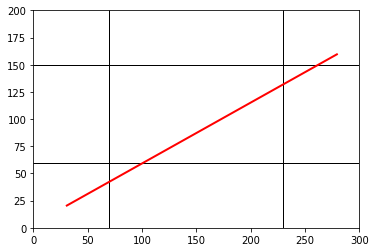

In [24]:
x0 = 30
y0 = 20
x1 = 280
y1 = 160

fig = Figure()
draw_outline(fig)
fig.draw_polygon([(x0, y0), (x1, y1)], linewidth=2, edgecolor='#FF0000')
fig.draw()


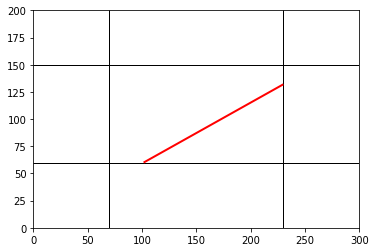

In [40]:
def clip(x_min, y_min, x_max, y_max, x1, y1, x2, y2):
    delta_x = x2 - x1
    delta_y = y2 - y1

    p1 = -delta_x
    p2 = delta_x
    p3 = -delta_y
    p4 = delta_y

    q1 = x1 - x_min
    q2 = x_max - x1
    q3 = y1 - y_min
    q4 = y_max - y1
    
    # p1 == 0 and q1 < 0: line is vertical (parallel to clipping window boundary) and starts left of the clipping window
    # p3 == 0 and q3 < 0: line is horizontal (parallel to clipping window boundary) and starts below clipping window
    # => do not draw line
    if p1 == 0 and q1 < 0 or p3 == 0 and q3 < 0:
        return None, None, None, None
    
    negative_values = [0]
    positive_values = [1]
    
    # line could still be parallel to clipping window, skip if the case
    if p1 != 0:
        r1 = q1 / p1
        r2 = q2 / p2

        # outside to inside
        if p1 < 0:
            negative_values.append(r1)
            positive_values.append(r2)
        
        # inside to outside
        else:
            negative_values.append(r2)
            positive_values.append(r1)
    
    # line could still be parallel to clipping window, skip if the case
    if p3 != 0:
        r3 = q3 / p3
        r4 = q4 / p4
        # outside to inside
        if p3 < 0:
            negative_values.append(r3)
            positive_values.append(r4)
        
        # inside to outside
        else:
            negative_values.append(r4)
            positive_values.append(r3)

    u1 = max(negative_values) # scaling factor for start point of line
    u2 = min(positive_values) # scaling factor for end point of line

    if u1 > u2:
        # line is outside of clipping window
        return None, None, None, None
    
    x_new_1 = x1 + p2 * u1
    y_new_1 = y1 + p4 * u1

    x_new_2 = x1 + p2 * u2
    y_new_2 = y1 + p4 * u2

    return x_new_1, y_new_1, x_new_2, y_new_2
    
# viewport
x_min = 70
x_max= 230
y_min = 60
y_max = 150

# line
x1 = 30
y1 = 20
x2 = 280
y2 = 160

fig = Figure()
draw_outline(fig)

x1, y1, x2, y2 = clip(x_min, y_min, x_max, y_max, x1, y1, x2, y2)

if x1 is not None:
    fig.draw_polygon([(x1, y1), (x2, y2)], linewidth=2, edgecolor='#FF0000')

fig.draw()
